<h1>Series de Fourier</h1>
<h5>Aplicación a ondas cuadradas</h5>

In [4]:
import numpy as np
import matplotlib.pylab as plt
from scipy import signal as sp
# Importamos todo el modulo sympy
from sympy import *
# Importamos las variables simbolicas 'n' y 't'\n",
from sympy.abc import n, t

<p>Parámetros de entrada</p>

Text(0.5, 0, 'tiempo(t)')

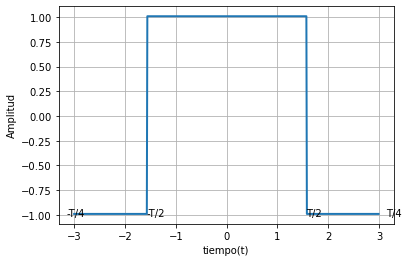

In [12]:
T = 2*pi # Periodo
w = (2*pi)/T # Frecuencia angular
A = 1 # Amplitud
tiempo = np.arange(-3, 3, 0.01)
FuncionTramos = (sp.square(tiempo + 1.57 )*A) + A/100

# Graficamos la onda cuadrada
plt.plot(tiempo, FuncionTramos, lw=2)
plt.grid()
plt.annotate('-T/2', xy = (-np.pi/2, -1), xytext = (-np.pi/2, -1.01))
plt.annotate('-T/4', xy = (-np.pi, -1), xytext = (-np.pi, -1.01))
plt.annotate('T/2', xy = (np.pi/2, -1), xytext = (np.pi/2, -1.01))
plt.annotate('T/4', xy = (np.pi, -1), xytext = (np.pi, -1.01))
plt.ylabel('Amplitud')
plt.xlabel('tiempo(t)')

Cálculo de los coeficientes ao, an y bn 

In [7]:
# Integramos la funcion (2/T) cuya variable es 't'
ao = (2/T)*(integrate(-1, (t, -T/2, -T/4)) + integrate(1, (t, -T/4, T/4)) + integrate(-1, (t, T/4, T/2)))

# Integramos la funcion (2/pi)*sin(2nt)
an = (2/T)*(integrate(-cos(n*w*t), (t, -T/2, -T/4)) + integrate(cos(n*w*t), (t, -T/4, T/4)) + integrate(-cos(n*w*t), (t, T/4, T/2)))

# Integramos la funcion (2/pi)*cos(2nt) 
bn = (2/T)*(integrate(-sin(n*w*t), (t, -T/2, -T/4)) + integrate(sin(n*w*t), (t, -T/4, T/4)) + integrate(-sin(n*w*t), (t, T/4, T/2)))

Cálculo de la serie de Fourier con 8 términos 

In [8]:
print( "f(x) = ")

ncoef = 16
serie = (ao)/2
for i in range(1, ncoef + 1):
    serie = serie + (an*cos(n*w*t)).subs(n, i)
for j in range(1, ncoef + 1):
    serie = serie + (bn*sin(n*w*t)).subs(n, j)

pprint(serie)

f(x) = 
4⋅cos(t)   4⋅cos(3⋅t)   4⋅cos(5⋅t)   4⋅cos(7⋅t)   4⋅cos(9⋅t)   4⋅cos(11⋅t)   4
──────── - ────────── + ────────── - ────────── + ────────── - ─────────── + ─
   π          3⋅π          5⋅π          7⋅π          9⋅π           11⋅π       

⋅cos(13⋅t)   4⋅cos(15⋅t)
────────── - ───────────
   13⋅π          15⋅π   


Salida Gráfica por cada término

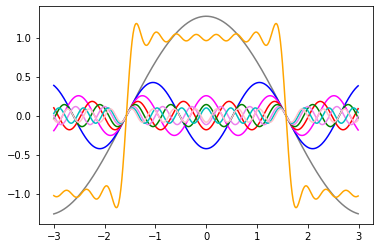

In [10]:
serie1 = (4*np.cos(tiempo)) / np.pi
plt.plot(tiempo, serie1, 'grey')

serie2 = -((4*np.cos(3*tiempo)) / (3*np.pi))
plt.plot(tiempo, serie2, 'blue')

serie3 = (4*np.cos(5*tiempo)) / (5*np.pi)
plt.plot(tiempo, serie3, 'magenta')

serie4 = -((4*np.cos(7*tiempo)) / (7*np.pi))
plt.plot(tiempo, serie4, 'red')

serie5= (4*np.cos(9*tiempo)) / (9*np.pi)
plt.plot(tiempo, serie5, 'green')

serie6 = -((4*np.cos(11*tiempo)) / (11*np.pi))
plt.plot(tiempo, serie6, 'violet')

serie7 = (4*np.cos(13*tiempo)) / (13*np.pi)
plt.plot(tiempo, serie7, 'c')

serie8 = -((4*np.cos(15*tiempo)) / (15*np.pi))
plt.plot(tiempo, serie8, 'pink')

serieFourier = serie1 + serie2 + serie3 + serie4 + serie5 + serie6 + serie7 + serie8
plt.plot(tiempo, serieFourier, 'orange')
plt.show()

Salida gráfica onda cuadrada y serie de Fourier

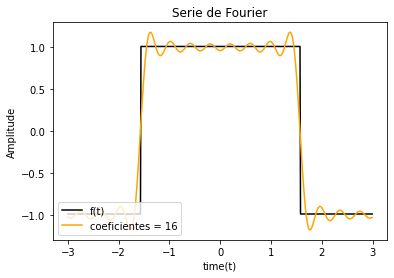

In [11]:
plt.plot(tiempo, FuncionTramos, 'black', label = 'f(t)')
etiqueta = 'coeficientes = '+ str(ncoef)
plt.plot(tiempo, serieFourier, 'orange', label = etiqueta)
plt.title('Serie de Fourier')
plt.xlabel('time(t)')
plt.ylabel('Amplitude')
plt.legend(loc = "lower left")
plt.show()